# Real-Time Counterfactual Defense Against Adversarial Attacks in ML-Based Intrusion Detection Systems Using DiCE
This notebook involves the making of machine learning & deep learning models to classify the given data of obtained as a network intrusion into differen classes (malignant or benign). Given a sample point, the objective of machine learning model will be to classify that whether the intrusion made is  **Benign** or is a **Bot**.

# Importing Libraries
First, we will import libraries that we need to start our workflow. The libraries we are using are:
* NumPy
* Pandas
* Matplotlib
* Scikit-learn
* Keras
* TensorFlow
* DiCE

In [ ]:
# Importing Libraries
# Numerical & Data Processing
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import LabelEncoder

# Explainable AI (XAI)
import dice_ml


# Loading the Data
First step is to load the available data into our memory.

In [ ]:
%%time
# load the data into memory
network_data = pd.read_csv('./data/03-02-2018.csv')

CPU times: total: 8.69 s
Wall time: 9.4 s


# EDA (Exploratory Data Analysis)
For making a proper undertanding of dataset we are using, we will perform a bief EDA (Exploratory Data Analysis). The EDA is sub-divided into:
* Data Visuals
* Data Understanding
* Data Analysis

In [3]:
# check the shape of data
network_data.shape

(1048575, 80)

In [5]:
# check the number of rows and columns
print('Number of Rows (Samples): %s' % str((network_data.shape[0])))
print('Number of Columns (Features): %s' % str((network_data.shape[1])))

Number of Rows (Samples): 1048575
Number of Columns (Features): 80


We have a total of **1 million+** samples and **80** features in data.

In [6]:
network_data.head(4)

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,6,02/03/2018 08:47:38,141385,9,7,553,3773.0,202,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,49684,6,02/03/2018 08:47:38,281,2,1,38,0.0,38,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,443,6,02/03/2018 08:47:40,279824,11,15,1086,10527.0,385,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,443,6,02/03/2018 08:47:40,132,2,0,0,0.0,0,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [7]:
# check the columns in data
network_data.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

The dataset is huge. We have a total of **80** columns in our data.

In [8]:
network_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Timestamp          1048575 non-null  object 
 3   Flow Duration      1048575 non-null  int64  
 4   Tot Fwd Pkts       1048575 non-null  int64  
 5   Tot Bwd Pkts       1048575 non-null  int64  
 6   TotLen Fwd Pkts    1048575 non-null  int64  
 7   TotLen Bwd Pkts    1048575 non-null  float64
 8   Fwd Pkt Len Max    1048575 non-null  int64  
 9   Fwd Pkt Len Min    1048575 non-null  int64  
 10  Fwd Pkt Len Mean   1048575 non-null  float64
 11  Fwd Pkt Len Std    1048575 non-null  float64
 12  Bwd Pkt Len Max    1048575 non-null  int64  
 13  Bwd Pkt Len Min    1048575 non-null  int64  
 14  Bwd Pkt Len Mean   1048575 non-null  float64
 15  Bwd Pkt Len Std    1048575 non-n

The following information tells us that:
* We have a huge amount of data, containing around **1 million** entries (samples)
* There are a total of **80** columns belonging to each sample
* There are missing values in our data, which need to be filled or dropped for proper modelling
* The memory consumption of data is about **300 MB**

In [9]:
# check the number of values for labels
network_data['Label'].value_counts()

Label
Benign    762384
Bot       286191
Name: count, dtype: int64

Most of the network intrusions in our data are benign (~76%), as output from above code cell. 

## Data Visualizations
After getting some useful information about our data, we now make visuals of our data to see how the trend in our data goes like. The visuals include bar plots, distribution plots, scatter plots, etc.

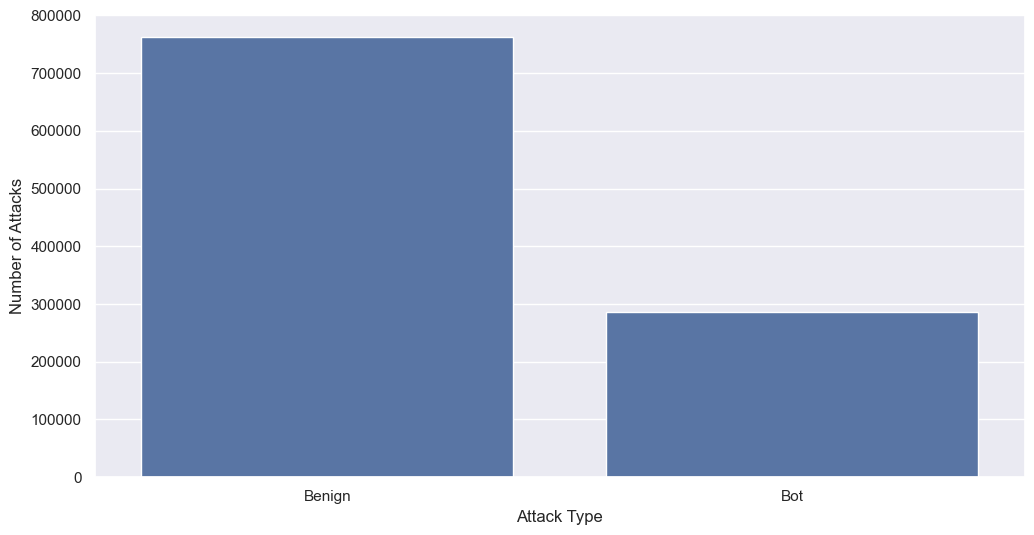

In [10]:
# make a plot number of labels
sns.set(rc={'figure.figsize':(12, 6)})
plt.xlabel('Attack Type')
sns.set_theme()
ax = sns.countplot(x='Label', data=network_data)
ax.set(xlabel='Attack Type', ylabel='Number of Attacks')
plt.show()

# Data Preprocessing
Data preprocessing plays an important part in the process of data science, since data may not be fully clean and can contain missing or null values. In this step, we are undergoing some preprocessing steps that will help us if there is any null or missing value in our data. 

In [11]:
# check for some null or missing values in our dataset
network_data.isna().sum().to_numpy()

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0, 2558,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0])

All features in the data have no null or missing values, except one feature that contains **2558** missing values. We need to remove this column from our data, so that our data may get cleaned.

In [12]:
# drop null or missing columns
cleaned_data = network_data.dropna()
cleaned_data.isna().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Label Encoding
The Label feature in the data contains 2 labels as Benign and Bot. All these are in string format.

In [13]:
# encode the column labels
label_encoder = LabelEncoder()
cleaned_data['Label']= label_encoder.fit_transform(cleaned_data['Label'])
cleaned_data['Label'].unique()

C:\Users\Sharjeel\AppData\Local\Temp\ipykernel_31240\2480667849.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Label']= label_encoder.fit_transform(cleaned_data['Label'])


array([0, 1])

In [14]:
# check for encoded labels
cleaned_data['Label'].value_counts()

Label
0    759826
1    286191
Name: count, dtype: int64

After removing the missing valued column in our data, we have now no feature that contains any missing or null value. Data is cleaned now.

## Shaping the data for Random Forest
For applying a convolutional neural network on our data, we will have to follow following steps:
* Seperate the data of each of the labels
* Create a numerical matrix representation of labels
* Apply resampling on data so that can make the distribution equal for all labels
* Create X (predictor) and Y (target) variables
* Split the data into train and test sets

In [15]:
# Create separate datasets
data_1 = cleaned_data[cleaned_data['Label'] == 0]
data_2 = cleaned_data[cleaned_data['Label'] == 1]

# Merge them
X = pd.concat([data_1, data_2], sort=True)

# Separate features and labels (without encoding)
y = X['Label']
X = X.drop(columns=['Label'])

In [17]:
print(X.shape)
print(y.shape)

(1046017, 79)
(1046017,)


In [18]:
# checking if there are some null values in data
X.isnull().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

The output of above cell shows that there are no null values in our data, and the data can now be used for model fitting. We have two types of datasets, normal and abnormal, and they'll be used for model fitting.

## Data Argumentation
To avoid biasing in data, we need to use data argumentation on it so that we can remove bias from data and make equal distributions.

In [ ]:


data_1_resample = resample(data_1, n_samples=20000, 
                           random_state=123, replace=True)
data_2_resample = resample(data_2, n_samples=20000, 
                           random_state=123, replace=True)

In [21]:
train_dataset = pd.concat([data_1_resample, data_2_resample])
train_dataset.head(2)

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
565071,53,17,02/03/2018 11:28:20,322,1,1,65,193.0,65,65,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
161268,3389,6,02/03/2018 03:00:10,1915100,8,7,1144,1581.0,677,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


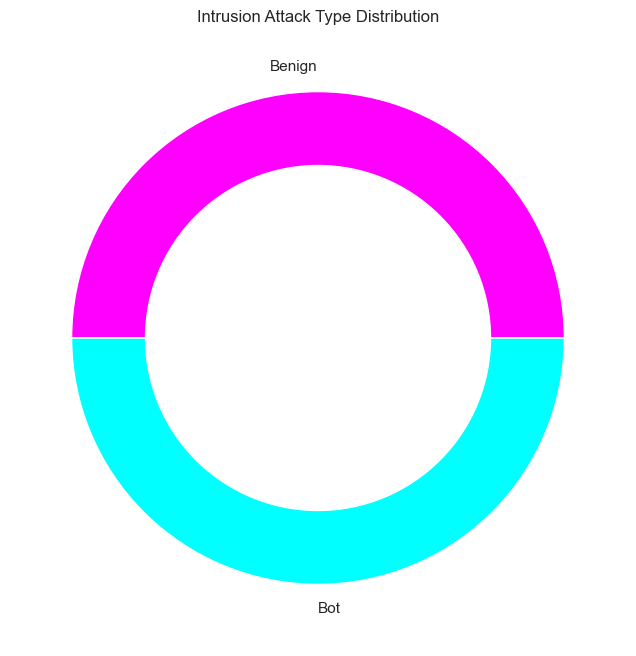

In [22]:
# viewing the distribution of intrusion attacks in our dataset 
plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.title('Intrusion Attack Type Distribution')
plt.pie(train_dataset['Label'].value_counts(), labels=['Benign', 'Bot'], colors=['magenta', 'cyan'])
p = plt.gcf()
p.gca().add_artist(circle)

## Making X & Y Variables

In [23]:
test_dataset = train_dataset.sample(frac=0.1)
y_train = train_dataset['Label']
y_test = test_dataset['Label']
y_train.unique(), y_test.unique()

(array([0, 1]), array([0, 1]))

## Data Splicing
This stage involves the data split into train & test sets. The training data will be used for training our model, and the testing data will be used to check the performance of model on unseen dataset. We're using a split of **90-10**, i.e., **90%** data to be used for training & **20%** to be used for testing purpose. We drop the irrelevant columns:

In [24]:
train_dataset = train_dataset.drop(columns = ["Timestamp", "Protocol","PSH Flag Cnt","Init Fwd Win Byts","Flow Byts/s","Flow Pkts/s"], axis=1)
test_dataset = test_dataset.drop(columns = ["Timestamp", "Protocol","PSH Flag Cnt","Init Fwd Win Byts","Flow Byts/s","Flow Pkts/s"], axis=1)

print(train_dataset.shape)

(40000, 74)


In [25]:
# making train & test splits
X_train = train_dataset.iloc[:, :-1].values
X_test = test_dataset.iloc[:, :-1].values

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40000, 73)
(4000, 73)
(40000,)
(4000,)


## Random Forest Training

In [ ]:
rf_classifier = RandomForestClassifier(
    n_estimators=100,             
    max_depth=3,                 
    min_samples_split=2,          
    min_samples_leaf=1,         
    bootstrap=True,                          
    random_state=42,              
    n_jobs=-1               
)

rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Validation MSE: {mse:.2f}")
print(f"Validation R^2 Score: {r2:.2f}")
print(f"Accuracy on original test data: {accuracy_score(y_test, rf_classifier.predict(X_test)):.2f}")

Validation MSE: 0.01
Validation R^2 Score: 0.97
Accuracy on original test data: 0.99


# Conclusion after Random Forest Training
After training our Random Forest Classifier on the training data and evaluating its performance on the test set, it can be interpreted that:
* The model was trained using **100** decision trees with a maximum depth of **3** and default values for *min_samples_split* and *min_samples_leaf*.
* The Random Forest model generalized well and showed strong predictive performance.
* The Mean Squared Error (MSE) on validation data was **0.01**, indicating that the model made very few incorrect predictions.
* The model achieved an impressive *R²* Score of **0.97**, which suggests that **97%** of the variability in the data is explained by the model.
* Therefore, the Random Forest Classifier proved to be highly effective for this classification task, with reliable performance and strong generalization capability.

Generate Counterfactuals and Analyze the Distribution of Distances for Malicious Samples:
- Continue generating counterfactuals for malicious samples with the desired class set to 0 (benign).
- Compute the Euclidean distances between each malicious sample and its counterfactuals: use the distribution of these distances to define a threshold.
- Compute Feature Changes for Adversarial Samples: Feature changes can be calculated as the count of features that differ between the original sample and the counterfactual.

In [ ]:
x = 10  # Specify the number of malicious samples to pick
malicious_samples = train_dataset[train_dataset['Label'] == 1].sample(n=x, random_state=42)

# Step 1: Wrap the model
model = dice_ml.Model(model=rf_classifier, backend="sklearn")

# Step 2: Create data object
data = dice_ml.Data(dataframe=train_dataset, continuous_features=list(train_dataset.columns.drop(['Label'])), outcome_name="Label")

# Step 3: Initialize DiCE
dice = dice_ml.Dice(data, model)

# Step 4: Generate Counterfactuals
adversarial_samples = []
n_counterfactuals = 3
malicious_distances = []
feature_changes_list = []

# Define features that can realistically change
mutable_features = [
    'Flow Duration', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts',
    'Fwd Pkt Len Max', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
    'Bwd Pkt Len Max', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std',
    'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
    'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
    'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min',
    'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var',
    'Pkt Size Avg', 'Active Mean', 'Active Std', 'Active Max', 'Active Min',
    'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min'
]

for i, sample in malicious_samples.iterrows():
    sample_to_explain = sample.drop("Label").to_frame().T
    counterfactuals = dice.generate_counterfactuals(
        sample_to_explain,
        total_CFs=n_counterfactuals,
        desired_class=0,
        features_to_vary=mutable_features
    )
    cf_df = counterfactuals.cf_examples_list[0].final_cfs_df
    distances = euclidean_distances(sample_to_explain, cf_df.drop(columns=["Label"]))
    malicious_distances.append(distances.mean())
    cf_features = cf_df.drop("Label", axis=1)  # Drop "Label" column from counterfactuals
    cf_features = cf_features[sample_to_explain.columns]  # Align columns with the original sample
    feature_changes = (cf_features != sample_to_explain.values).sum(axis=1).mean()
    feature_changes_list.append(feature_changes)
    cf_df["Label"] = 1
    adversarial_samples.append(cf_df)

# Combine and save
adversarial_samples_df = pd.concat(adversarial_samples, ignore_index=True)
adversarial_samples_df.to_csv("adversarial_samples.csv", index=False)
print("Adversarial samples saved to adversarial_samples.csv")

  0%|          | 0/1 [00:00<?, ?it/s]C:\Users\Sharjeel\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Sharjeel\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Sharjeel\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Sharjeel\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Sharjeel\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without fea

Adversarial samples saved to adversarial_samples.csv


Set the Threshold Based on Percentiles:
- Use the 5th percentile of the distances as the threshold to account for most malicious samples while excluding outliers.

Suggested Distance Threshold (5th Percentile): 218756884.33


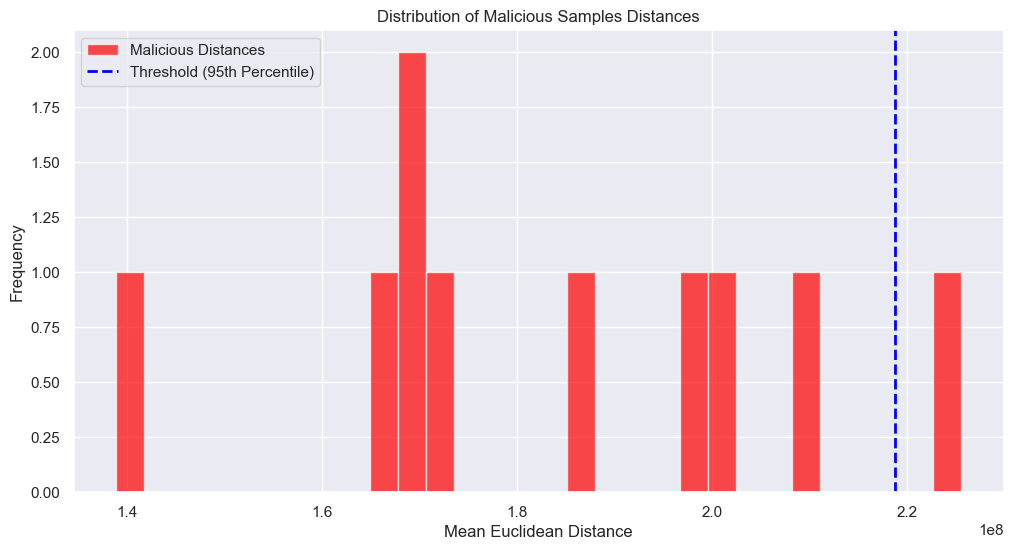

In [ ]:
# Set the threshold as the 5th percentile of malicious distances
distance_threshold = np.percentile(malicious_distances, 95)
print(f"Suggested Distance Threshold (95th Percentile): {distance_threshold:.2f}")

# Visualize the distribution of distances
plt.hist(malicious_distances, bins=30, alpha=0.7, color='red', label='Malicious Distances')
plt.axvline(distance_threshold, color='blue', linestyle='dashed', linewidth=2, label='Threshold (95th Percentile)')
plt.xlabel('Mean Euclidean Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Malicious Samples Distances')
plt.legend()
plt.show()

Validate the Threshold:
- The threshold is validated by checking how many adversarial samples fall below the threshold.

In [155]:
# Validate the threshold
adversarial_classified_as_adversarial = malicious_distances <= distance_threshold

# Print validation results
accuracy = adversarial_classified_as_adversarial.sum() / len(malicious_distances) * 100
print(f"Accuracy of Threshold on Adversarial Samples: {accuracy:.2f}%")

Accuracy of Threshold on Adversarial Samples: 90.00%


Analyze the Distribution of Feature Changes:
- Once we have the list of feature changes for all adversarial samples, we analyze their distribution by using a histogram to visualize the spread of feature changes.
- Use a percentile-based approach to set the threshold for feature changes, similar to the distance threshold. For example, use the 5th percentile to exclude outliers and account for most adversarial samples.

Suggested Feature Change Threshold (5th Percentile): 15.67


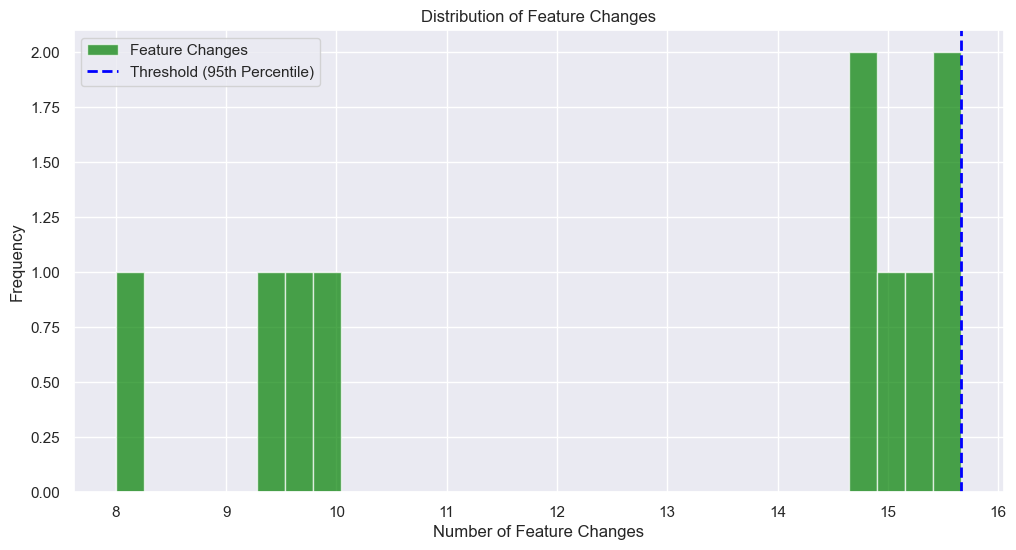

In [ ]:
feature_change_threshold = np.percentile(feature_changes_list, 95)
print(f"Suggested Feature Change Threshold (95th Percentile): {feature_change_threshold:.2f}")

# Visualize the distribution of feature changes
plt.hist(feature_changes_list, bins=30, alpha=0.7, color='green', label='Feature Changes')
plt.axvline(feature_change_threshold, color='blue', linestyle='dashed', linewidth=2, label='Threshold (95th Percentile)')
plt.xlabel('Number of Feature Changes')
plt.ylabel('Frequency')
plt.title('Distribution of Feature Changes')
plt.legend()
plt.show()

Validate the Feature Change Threshold:
- Check how many adversarial samples fall below the threshold.
This ensures that the threshold is effective in identifying adversarial samples.

In [153]:
adversarial_classified_as_adversarial = np.array(feature_changes_list) <= feature_change_threshold
accuracy = adversarial_classified_as_adversarial.sum() / len(feature_changes_list) * 100
print(f"Accuracy of Feature Change Threshold on Adversarial Samples: {accuracy:.2f}%")

Accuracy of Feature Change Threshold on Adversarial Samples: 100.00%


FINALLY: Processing Input Packet:

In [ ]:
adversarial_samples = pd.read_csv("adversarial_samples.csv")

# Reinitialize the data object with adversarial_samples
data = dice_ml.Data(dataframe=adversarial_samples, continuous_features=list(adversarial_samples.columns.drop(['Label'])), outcome_name="Label")
dice = dice_ml.Dice(data, model)

# Select a sample
n = 1  # Specify the number of records to load
sample = adversarial_samples.sample(n=n, random_state=42)
sample_features = sample.drop(columns=["Label"])  # Drop the "Label" column to get features

# Predict using the Random Forest classifier
y_pred = rf_classifier.predict(sample_features)

# FIRST ML-BASED LAYER
if y_pred[0] == 1:  # Check if the prediction is malicious
    print("Sample was predicted as malicious.")
else:
    # Proceed to generate counterfactuals if the sample is predicted as benign
    sample_to_explain2 = sample_features

    try:
        # Generate counterfactuals
        counterfactuals2 = dice.generate_counterfactuals(
            sample_to_explain2,
            total_CFs=n_counterfactuals,  # Increase the number of counterfactuals
            desired_class=0,
            features_to_vary=mutable_features
        )
        cf_df2 = counterfactuals2.cf_examples_list[0].final_cfs_df
        print("Counterfactuals generated successfully.")
    
    except Exception as e:
        print("Failed to generate counterfactuals for the input sample.")
        print("The sample is likely truly benign (large distance to cfs).")

    # Compute distances and feature changes
    cf_features = cf_df2.drop("Label", axis=1)  # Drop "Label" column from counterfactuals
    distances2 = euclidean_distances(sample_to_explain2, cf_features)
    final_distance = distances2.mean()
    final_feature_changes = (cf_features != sample_to_explain2.values).sum(axis=1).mean()

    # Use distance to decide if the sample is adversarial
    if final_distance < distance_threshold and final_feature_changes < feature_change_threshold:
        print("The sample is possibly adversarial (small distance to cfs).")
    else:
        print("The sample is likely truly benign (large distance to cfs).")

    

C:\Users\Sharjeel\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

  0%|          | 0/1 [00:00<?, ?it/s]C:\Users\Sharjeel\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Sharjeel\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Sharjeel\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Sharjeel\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without fea

Counterfactuals generated successfully.
The sample is possibly adversarial (small distance to cfs).
